In [2]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

from pysr import PySRRegressor

from scipy.optimize import curve_fit

In [3]:
from physical_formula_spinvdisk2 import disks_physical_formula_func as phys_eqn

In [4]:
df_normalized_31 = pd.read_csv('Halo Mass Normalized Dataset w 31 features.csv')

In [5]:
df_normalized_31.loc[:, 'BulgeMstar_ratio'] = df_normalized_31.loc[:,'GalpropNormMbulge']/df_normalized_31.loc[:, 'GalpropNormMstar']

In [6]:
# 7,865 galaxies in df_1
df_1 = df_normalized_31.loc[df_normalized_31.loc[:, 'BulgeMstar_ratio']<=0.10] 

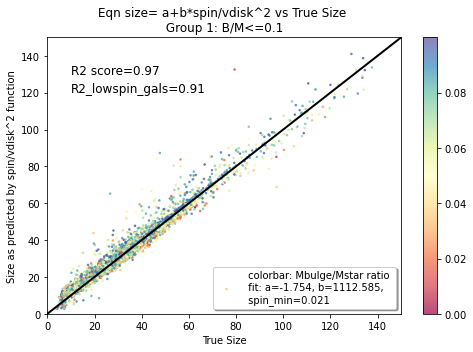

In [8]:
results_df_1 = phys_eqn(df_1, group = 'Group 1: B/M<=0.1')

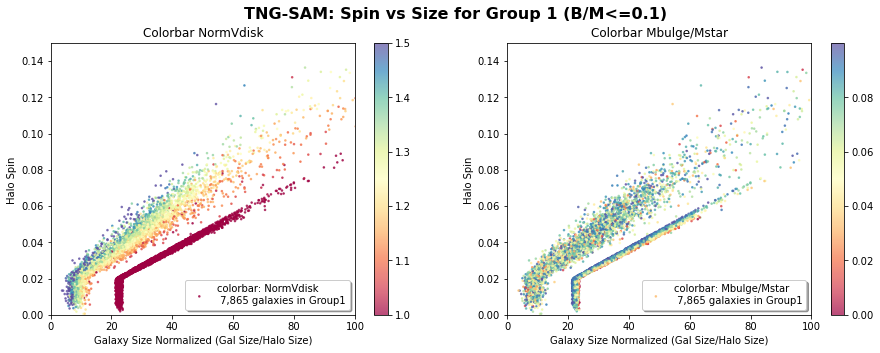

In [150]:
fig1_spinsize,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig1_spinsize.suptitle('TNG-SAM: Spin vs Size for Group 1 (B/M<=0.1)', fontsize=16, fontweight='bold')

im1 = ax1.scatter(df_1.loc[:,'GalpropNormHalfRadius'], df_1.loc[:, 'HalopropSpin'],
            c = df_1['GalpropNormVdisk'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: NormVdisk \n 7,865 galaxies in Group1', vmin=1.0, vmax=1.5) # c = df_5['BulgeMstar_ratio']
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax1.axis([0.0,100, 0.0,0.15])
# ax1.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax1.set_title('Colorbar NormVdisk')
ax1.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax1.set_ylabel('Halo Spin ')
ax1.legend(loc='lower right' , shadow=True)
fig1_spinsize.colorbar(im1, ax=ax1)
               
im2 = ax2.scatter(df_1.loc[:,'GalpropNormHalfRadius'], df_1.loc[:, 'HalopropSpin'],
            c = df_1['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: Mbulge/Mstar \n 7,865 galaxies in Group1') #, vmin=1.0, vmax=1.4) # 
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax2.axis([0.0,100, 0.0,0.15])
# ax2.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax2.set_title('Colorbar Mbulge/Mstar')
ax2.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax2.set_ylabel('Halo Spin ')
ax2.legend(loc='lower right' , shadow=True)
fig1_spinsize.colorbar(im2, ax=ax2)
# plt.savefig('Group1_Spin_vs_Size_vdisk_bmratio_color.jpeg', dpi=500)
plt.show()

In [9]:
popt1 = results_df_1[1]

In [10]:
fig_1 = results_df_1[4]

In [11]:
# fig_1.savefig('v17_fig_1', dpi=500)

In [12]:
# 13,921 galaxies in df_2
df_2 = df_normalized_31.loc[(df_normalized_31.BulgeMstar_ratio > 0.10) & (df_normalized_31.BulgeMstar_ratio <= 0.20)] 

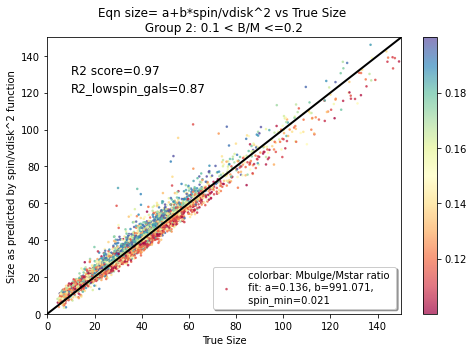

In [13]:
results_df_2 = phys_eqn(df_2, group = 'Group 2: 0.1 < B/M <=0.2')

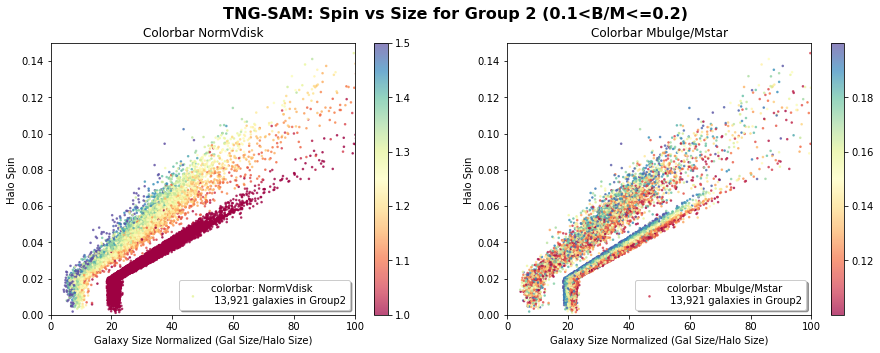

In [149]:
fig2_spinsize,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig2_spinsize.suptitle('TNG-SAM: Spin vs Size for Group 2 (0.1<B/M<=0.2)', fontsize=16, fontweight='bold')

im1 = ax1.scatter(df_2.loc[:,'GalpropNormHalfRadius'], df_2.loc[:, 'HalopropSpin'],
            c = df_2['GalpropNormVdisk'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: NormVdisk \n 13,921 galaxies in Group2', vmin=1.0, vmax=1.5) # c = df_5['BulgeMstar_ratio']
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax1.axis([0.0,100, 0.0,0.15])
# ax1.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax1.set_title('Colorbar NormVdisk')
ax1.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax1.set_ylabel('Halo Spin ')
ax1.legend(loc='lower right' , shadow=True)
fig2_spinsize.colorbar(im1, ax=ax1)
               
im2 = ax2.scatter(df_2.loc[:,'GalpropNormHalfRadius'], df_2.loc[:, 'HalopropSpin'],
            c = df_2['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: Mbulge/Mstar \n 13,921 galaxies in Group2') #, vmin=1.0, vmax=1.4) # 
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax2.axis([0.0,100, 0.0,0.15])
# ax2.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax2.set_title('Colorbar Mbulge/Mstar')
ax2.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax2.set_ylabel('Halo Spin ')
ax2.legend(loc='lower right' , shadow=True)
fig2_spinsize.colorbar(im2, ax=ax2)
# plt.savefig('Group2_Spin_vs_Size_vdisk_bmratio_color.jpeg', dpi=500)
plt.show()

In [14]:
popt2 = results_df_2[1]
fig_2 = results_df_2[4]
# fig_2.savefig('v17_fig_2', dpi=500)

In [15]:
# 6,880 galaxies in df_3
df_3 = df_normalized_31.loc[(df_normalized_31.BulgeMstar_ratio > 0.20) & (df_normalized_31.BulgeMstar_ratio <= 0.30)] 

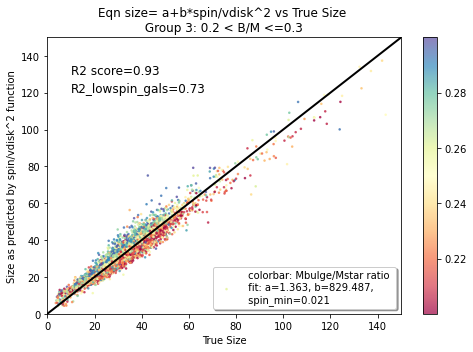

In [16]:
results_df_3 = phys_eqn(df_3, group = 'Group 3: 0.2 < B/M <=0.3')

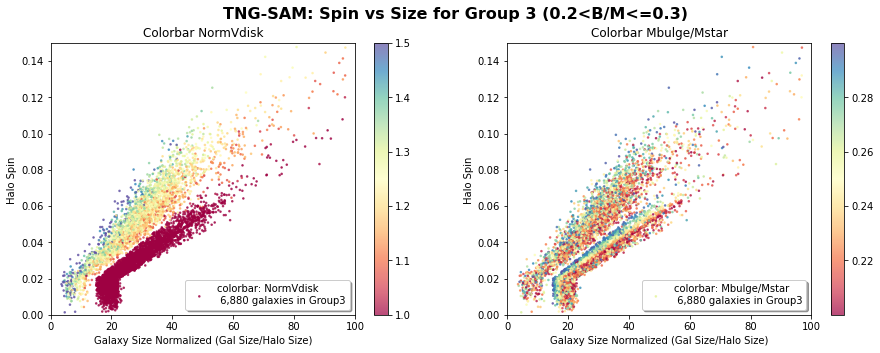

In [144]:
fig3_spinsize,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig3_spinsize.suptitle('TNG-SAM: Spin vs Size for Group 3 (0.2<B/M<=0.3)', fontsize=16, fontweight='bold')

im1 = ax1.scatter(df_3.loc[:,'GalpropNormHalfRadius'], df_3.loc[:, 'HalopropSpin'],
            c = df_3['GalpropNormVdisk'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: NormVdisk \n 6,880 galaxies in Group3', vmin=1.0, vmax=1.5) # c = df_5['BulgeMstar_ratio']
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax1.axis([0.0,100, 0.0,0.15])
# ax1.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax1.set_title('Colorbar NormVdisk')
ax1.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax1.set_ylabel('Halo Spin ')
ax1.legend(loc='lower right' , shadow=True)
fig3_spinsize.colorbar(im1, ax=ax1)
               
im2 = ax2.scatter(df_3.loc[:,'GalpropNormHalfRadius'], df_3.loc[:, 'HalopropSpin'],
            c = df_3['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: Mbulge/Mstar \n 6,880 galaxies in Group3') #, vmin=1.0, vmax=1.4) # 
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax2.axis([0.0,100, 0.0,0.15])
# ax2.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax2.set_title('Colorbar Mbulge/Mstar')
ax2.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax2.set_ylabel('Halo Spin ')
ax2.legend(loc='lower right' , shadow=True)
fig3_spinsize.colorbar(im2, ax=ax2)
# plt.savefig('Group3_Spin_vs_Size_vdisk_bmratio_color.jpeg', dpi=500)
plt.show()

In [17]:
popt3 = results_df_3[1]
fig_3 = results_df_3[4]
# fig_3.savefig('v17_fig_3', dpi=500)

In [18]:
# 2,858 galaxies in df_4
df_4 = df_normalized_31.loc[(df_normalized_31.BulgeMstar_ratio > 0.30) & (df_normalized_31.BulgeMstar_ratio <= 0.40)] 

/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/scipy-1.8.0rc2-py3.9-macosx-11.1-arm64.egg/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


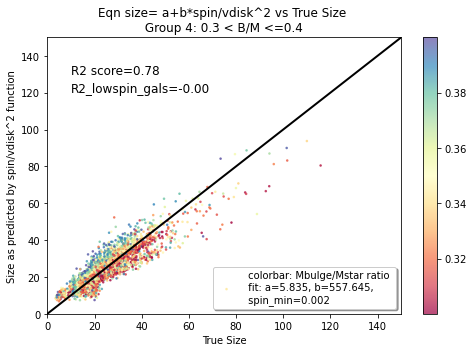

In [19]:
results_df_4 = phys_eqn(df_4, group = 'Group 4: 0.3 < B/M <=0.4')

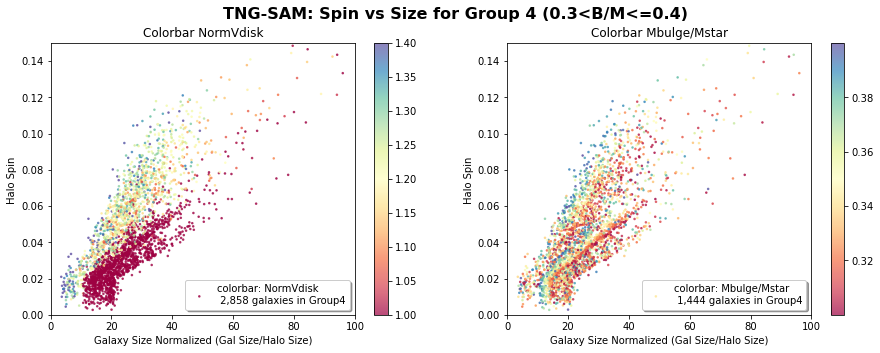

In [137]:
fig4_spinsize,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig4_spinsize.suptitle('TNG-SAM: Spin vs Size for Group 4 (0.3<B/M<=0.4)', fontsize=16, fontweight='bold')

im1 = ax1.scatter(df_4.loc[:,'GalpropNormHalfRadius'], df_4.loc[:, 'HalopropSpin'],
            c = df_4['GalpropNormVdisk'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: NormVdisk \n 2,858 galaxies in Group4', vmin=1.0, vmax=1.4) # c = df_5['BulgeMstar_ratio']
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax1.axis([0.0,100, 0.0,0.15])
# ax1.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax1.set_title('Colorbar NormVdisk')
ax1.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax1.set_ylabel('Halo Spin ')
ax1.legend(loc='lower right' , shadow=True)
fig4_spinsize.colorbar(im1, ax=ax1)
               
im2 = ax2.scatter(df_4.loc[:,'GalpropNormHalfRadius'], df_4.loc[:, 'HalopropSpin'],
            c = df_4['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: Mbulge/Mstar \n 1,444 galaxies in Group4') #, vmin=1.0, vmax=1.4) # 
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax2.axis([0.0,100, 0.0,0.15])
# ax2.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax2.set_title('Colorbar Mbulge/Mstar')
ax2.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax2.set_ylabel('Halo Spin ')
ax2.legend(loc='lower right' , shadow=True)
fig4_spinsize.colorbar(im2, ax=ax2)
# plt.savefig('Group4_Spin_vs_Size_vdisk_bmratio_color.jpeg', dpi=500)
plt.show()

In [20]:
popt4 = results_df_4[1]
fig_4 = results_df_4[4]
# fig_4.savefig('v17_fig_4', dpi=500)

In [21]:
# 1,444 galaxies in df_5
df_5 = df_normalized_31.loc[(df_normalized_31.BulgeMstar_ratio > 0.40) & (df_normalized_31.BulgeMstar_ratio <= 0.50)] 

/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/scipy-1.8.0rc2-py3.9-macosx-11.1-arm64.egg/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


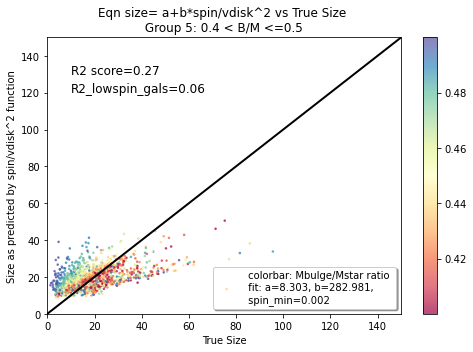

In [22]:
results_df_5 = phys_eqn(df_5, group = 'Group 5: 0.4 < B/M <=0.5')

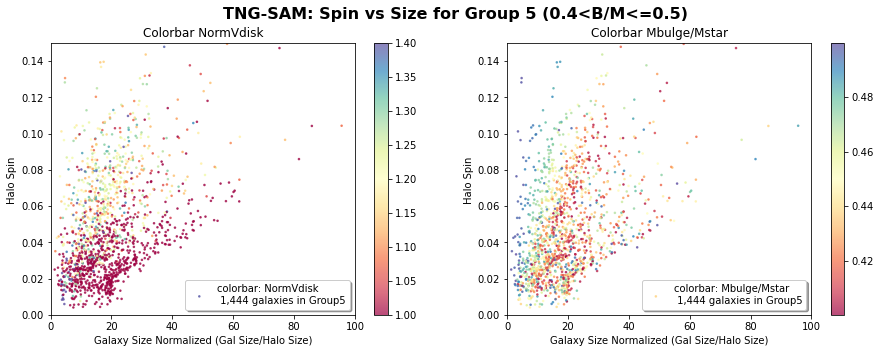

In [138]:
fig5_spinsize,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig5_spinsize.suptitle('TNG-SAM: Spin vs Size for Group 5 (0.4<B/M<=0.5)', fontsize=16, fontweight='bold')

im1 = ax1.scatter(df_5.loc[:,'GalpropNormHalfRadius'], df_5.loc[:, 'HalopropSpin'],
            c = df_5['GalpropNormVdisk'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: NormVdisk \n 1,444 galaxies in Group5', vmin=1.0, vmax=1.4) # c = df_5['BulgeMstar_ratio']
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax1.axis([0.0,100, 0.0,0.15])
# ax1.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax1.set_title('Colorbar NormVdisk')
ax1.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax1.set_ylabel('Halo Spin ')
ax1.legend(loc='lower right' , shadow=True)
fig5_spinsize.colorbar(im1, ax=ax1)
               
im2 = ax2.scatter(df_5.loc[:,'GalpropNormHalfRadius'], df_5.loc[:, 'HalopropSpin'],
            c = df_5['BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label = 'colorbar: Mbulge/Mstar \n 1,444 galaxies in Group5') #, vmin=1.0, vmax=1.4) # 
# plt.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax2.axis([0.0,100, 0.0,0.15])
# ax2.set_title('Halo Spin vs Galaxy Size \n Group 5: 0.4<B/M<=0.5')
ax2.set_title('Colorbar Mbulge/Mstar')
ax2.set_xlabel('Galaxy Size Normalized (Gal Size/Halo Size)')
ax2.set_ylabel('Halo Spin ')
ax2.legend(loc='lower right' , shadow=True)
fig5_spinsize.colorbar(im2, ax=ax2)
# plt.savefig('Group5_Spin_vs_Size_vdisk_bmratio_color.jpeg', dpi=500)
plt.show()

In [23]:
popt5 = results_df_5[1]
fig_5 = results_df_5[4]
# fig_5.savefig('v17_fig_5', dpi=500)

In [24]:
# 2,422 galaxies in df_5
df_6 = df_normalized_31.loc[df_normalized_31.loc[:, 'BulgeMstar_ratio']>0.50] 

In [25]:
df_6.shape

(2422, 33)

In [26]:
eqn11 = 291.3*np.abs(df_6.loc[:,'GalpropNormMstar_merge'])**df_6.loc[:,'BulgeMstar_ratio']/df_6.loc[:,'GalpropNormSigmaBulge']**3

In [27]:
r2_score_11=r2_score(df_6.loc[:, 'GalpropNormHalfRadius'], eqn11)

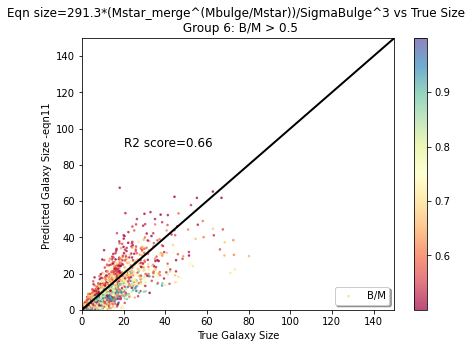

In [28]:
fig_complete, ax = plt.subplots(figsize=(7, 5))
    
ax = plt.subplot()

fig_6 = ax.scatter(df_6.loc[:, 'GalpropNormHalfRadius'], eqn11,
            c = df_6.loc[:,'BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7,label= 'B/M') #, vmin=-2, vmax=1.0)
ax.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_11), size=12)
ax.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax.set_xlim([0.0,150])
ax.set_ylim([0.0,150])
ax.set_title('Eqn size=291.3*(Mstar_merge^(Mbulge/Mstar))/SigmaBulge^3 vs True Size \n Group 6: B/M > 0.5')
ax.set_xlabel('True Galaxy Size')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Galaxy Size -eqn11 ')
fig_complete.colorbar(fig_6, ax=ax)
# plt.savefig('Ellipticals_SR_eqn6_vs_true_gal_size.jpeg', dpi=500)
plt.show()

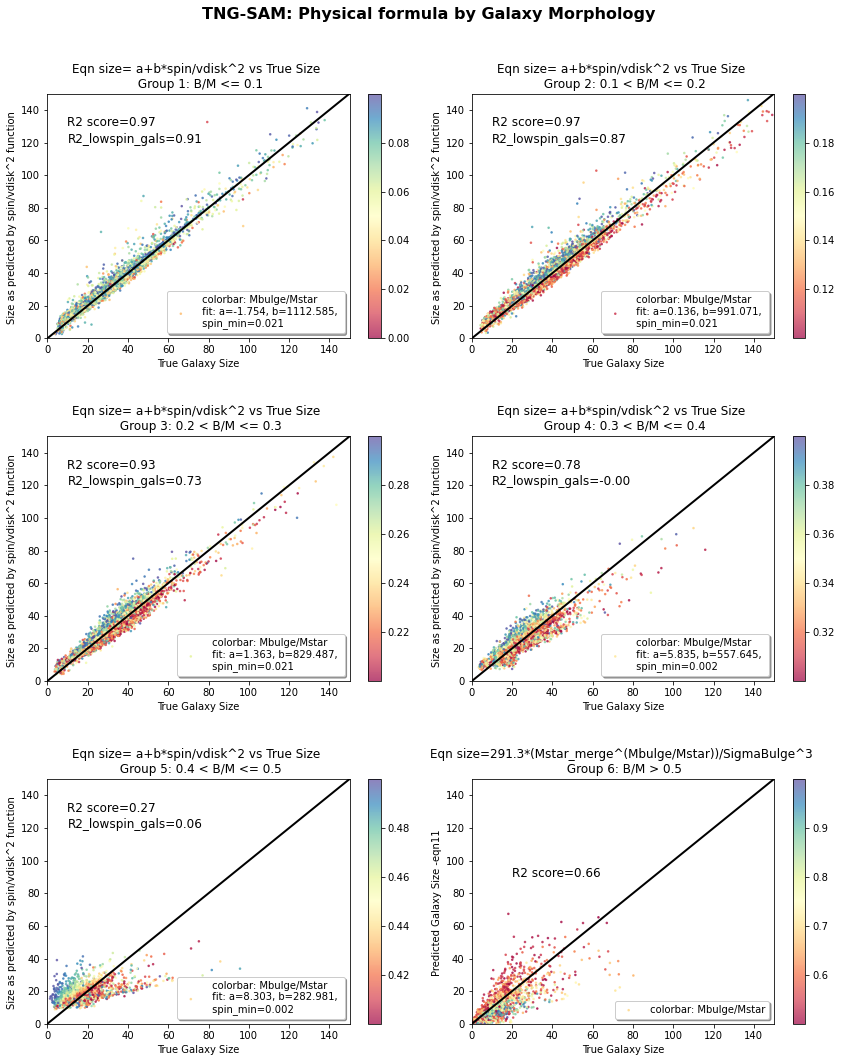

In [111]:
import matplotlib.cm as cm
import matplotlib.colors as norm
# from OpenCV import cv2 as cv #package OpenCV not installed

fig_all,[(ax1, ax2), (ax3, ax4), (ax5, ax6)]=plt.subplots(nrows=3,ncols=2,figsize=(12,15))
fig_all.suptitle('TNG-SAM: Physical formula by Galaxy Morphology', fontsize=16, fontweight='bold')


fig_1 = ax1.scatter(df_1.loc[:, 'GalpropNormHalfRadius'], results_df_1[3],
            c = df_1.loc[:,'BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label=' colorbar: Mbulge/Mstar \n fit: a=%5.3f, b=%5.3f, \n spin_min=%5.3f' % tuple(popt1)) #,label= label, vmin=-2, vmax=1.0)
ax1.text(10, 130, 'R2 score=' + '{:.2f}'.format(results_df_1[5]), size=12)
ax1.text(10, 120, 'R2_lowspin_gals=' + '{:.2f}'.format(results_df_1[6]), size=12)
ax1.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax1.set_xlim([0.0,150])
ax1.set_ylim([0.0,150])
ax1.set_title('Eqn size= a+b*spin/vdisk^2 vs True Size \n Group 1: B/M <= 0.1')
ax1.set_xlabel('True Galaxy Size')
ax1.legend(loc = 'lower right', shadow=True)
ax1.set_ylabel('Size as predicted by spin/vdisk^2 function ')
fig_all.colorbar(fig_1, ax=ax1)

fig_2 = ax2.scatter(df_2.loc[:, 'GalpropNormHalfRadius'], results_df_2[3],
            c = df_2.loc[:,'BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label=' colorbar: Mbulge/Mstar \n fit: a=%5.3f, b=%5.3f, \n spin_min=%5.3f' % tuple(popt2)) #,label= label, vmin=-2, vmax=1.0)
ax2.text(10, 130, 'R2 score=' + '{:.2f}'.format(results_df_2[5]), size=12)
ax2.text(10, 120, 'R2_lowspin_gals=' + '{:.2f}'.format(results_df_2[6]), size=12)
ax2.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax2.set_xlim([0.0,150])
ax2.set_ylim([0.0,150])
ax2.set_title('Eqn size= a+b*spin/vdisk^2 vs True Size \n Group 2: 0.1 < B/M <= 0.2')
ax2.set_xlabel('True Galaxy Size')
ax2.legend(loc = 'lower right', shadow=True)
ax2.set_ylabel('Size as predicted by spin/vdisk^2 function ')
fig_all.colorbar(fig_2, ax=ax2)

fig_3 = ax3.scatter(df_3.loc[:, 'GalpropNormHalfRadius'], results_df_3[3],
            c = df_3.loc[:,'BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label=' colorbar: Mbulge/Mstar \n fit: a=%5.3f, b=%5.3f, \n spin_min=%5.3f' % tuple(popt3)) #,label= label, vmin=-2, vmax=1.0)
ax3.text(10, 130, 'R2 score=' + '{:.2f}'.format(results_df_3[5]), size=12)
ax3.text(10, 120, 'R2_lowspin_gals=' + '{:.2f}'.format(results_df_3[6]), size=12)
ax3.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax3.set_xlim([0.0,150])
ax3.set_ylim([0.0,150])
ax3.set_title('Eqn size= a+b*spin/vdisk^2 vs True Size \n Group 3: 0.2 < B/M <= 0.3')
ax3.set_xlabel('True Galaxy Size')
ax3.legend(loc = 'lower right', shadow=True)
ax3.set_ylabel('Size as predicted by spin/vdisk^2 function ')
fig_all.colorbar(fig_3, ax=ax3)

fig_4 = ax4.scatter(df_4.loc[:, 'GalpropNormHalfRadius'], results_df_4[3],
            c = df_4.loc[:,'BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label=' colorbar: Mbulge/Mstar \n fit: a=%5.3f, b=%5.3f, \n spin_min=%5.3f' % tuple(popt4)) #,label= label, vmin=-2, vmax=1.0)
ax4.text(10, 130, 'R2 score=' + '{:.2f}'.format(results_df_4[5]), size=12)
ax4.text(10, 120, 'R2_lowspin_gals=' + '{:.2f}'.format(results_df_4[6]), size=12)
ax4.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax4.set_xlim([0.0,150])
ax4.set_ylim([0.0,150])
ax4.set_title('Eqn size= a+b*spin/vdisk^2 vs True Size \n Group 4: 0.3 < B/M <= 0.4')
ax4.set_xlabel('True Galaxy Size')
ax4.legend(loc = 'lower right', shadow=True)
ax4.set_ylabel('Size as predicted by spin/vdisk^2 function ')
fig_all.colorbar(fig_4, ax=ax4)

fig_5 = ax5.scatter(df_5.loc[:, 'GalpropNormHalfRadius'], results_df_5[3],
            c = df_5.loc[:,'BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label=' colorbar: Mbulge/Mstar \n fit: a=%5.3f, b=%5.3f, \n spin_min=%5.3f' % tuple(popt5)) #,label= label, vmin=-2, vmax=1.0)
ax5.text(10, 130, 'R2 score=' + '{:.2f}'.format(results_df_5[5]), size=12)
ax5.text(10, 120, 'R2_lowspin_gals=' + '{:.2f}'.format(results_df_5[6]), size=12)
ax5.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax5.set_xlim([0.0,150])
ax5.set_ylim([0.0,150])
ax5.set_title('Eqn size= a+b*spin/vdisk^2 vs True Size \n Group 5: 0.4 < B/M <= 0.5')
ax5.set_xlabel('True Galaxy Size')
ax5.legend(loc = 'lower right', shadow=True)
ax5.set_ylabel('Size as predicted by spin/vdisk^2 function ')
fig_all.colorbar(fig_5, ax=ax5)


fig_6 = ax6.scatter(df_6.loc[:, 'GalpropNormHalfRadius'], eqn11,
            c = df_6.loc[:,'BulgeMstar_ratio'],  cmap='Spectral',
            s=10, marker='.', alpha=0.7, label=' colorbar: Mbulge/Mstar') #,label= label, vmin=-2, vmax=1.0)
ax6.text(20, 90, 'R2 score=' + '{:.2f}'.format(r2_score_11), size=12)
ax6.plot([0.0, 150], [0.0, 150], color = 'black', linewidth = 2)
ax6.set_xlim([0.0,150])
ax6.set_ylim([0.0,150])
ax6.set_title('Eqn size=291.3*(Mstar_merge^(Mbulge/Mstar))/SigmaBulge^3 \n Group 6: B/M > 0.5')
ax6.set_xlabel('True Galaxy Size')
ax6.legend(loc = 'lower right', shadow=True)
ax6.set_ylabel('Predicted Galaxy Size -eqn11 ')
fig_all.colorbar(fig_6, ax=ax6)

# def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
#     "Sign sets of subplots with title"
#     row = fig.add_subplot(grid)
#     # the '\n' is important
#     row.set_title(f'{title}\n', fontweight='semibold')
#     # hide subplot
#     row.set_frame_on(False)
#     row.axis('off')
    
# grid2 = plt.GridSpec(2, 2)
# create_subtitle(fig2, grid2[0, ::], 'mHI')
# create_subtitle(fig2, grid2[1, ::], 'mH2')
fig_all.tight_layout()
fig_all.subplots_adjust(top=0.90, hspace=0.4) #, wspace=0.4)

# plt.savefig("TNG-SAM_physical_formula_by_Galaxy_Morphology.jpeg", dpi=500)
plt.show()

### popt trend over galaxy morphology bins

In [51]:
mean_BulgeMstar_per_bin = [np.mean(df_1.loc[:, 'BulgeMstar_ratio']),
                                   np.mean(df_2.loc[:, 'BulgeMstar_ratio']),
                                   np.mean(df_3.loc[:, 'BulgeMstar_ratio']),
                                   np.mean(df_4.loc[:, 'BulgeMstar_ratio']),
                                   np.mean(df_5.loc[:, 'BulgeMstar_ratio'])
                          ]

In [52]:
mean_BulgeMstar_per_bin = np.array(mean_BulgeMstar_per_bin)

In [53]:
mean_BulgeMstar_per_bin

array([0.06982786, 0.14585577, 0.24323396, 0.34318895, 0.44589366])

In [61]:
popt1[2]

0.021028390609319988

In [55]:
a_values_per_bin = [popt1[0], popt2[0], popt3[0], popt4[0], popt5[0]]

In [56]:
a_values_per_bin = np.array(a_values_per_bin)

In [58]:
b_values_per_bin = [popt1[1], popt2[1], popt3[1], popt4[1], popt5[1]]

In [59]:
b_values_per_bin = np.array(b_values_per_bin)

In [99]:
spin_min_values_per_bin = [popt1[2], popt2[2], popt3[2], popt4[2], popt5[2]]

In [100]:
spin_min_values_per_bin = np.array (spin_min_values_per_bin)

In [112]:
spin_min_values_per_bin

array([0.02102839, 0.02055419, 0.02092947, 0.002     , 0.002     ])

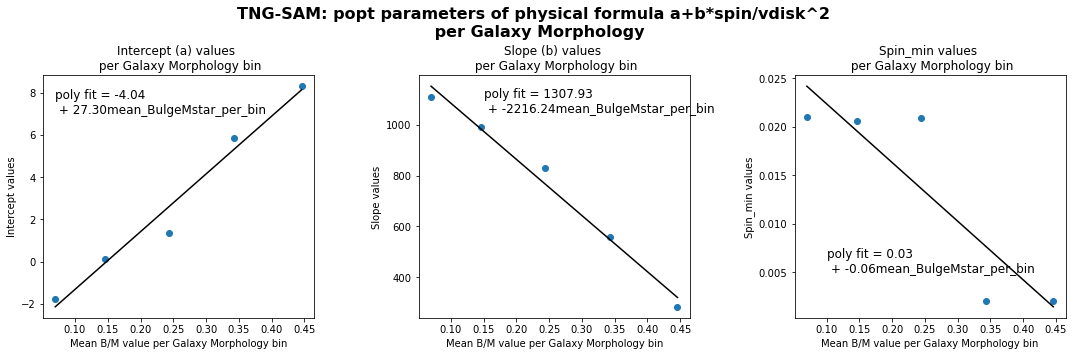

In [108]:
fig,[ax1, ax2, ax3]=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig.suptitle('TNG-SAM: popt parameters of physical formula a+b*spin/vdisk^2 \n per Galaxy Morphology', fontsize=16, fontweight='bold')

b1_poly, a1_poly = np.polyfit(mean_BulgeMstar_per_bin, a_values_per_bin , 1)

ax1.scatter(mean_BulgeMstar_per_bin, a_values_per_bin)
ax1.set_title('Intercept (a) values \n per Galaxy Morphology bin')
ax1.set_xlabel('Mean B/M value per Galaxy Morphology bin')
ax1.set_ylabel('Intercept values')
#add line of best fit to plot
ax1.plot(mean_BulgeMstar_per_bin, b1_poly*mean_BulgeMstar_per_bin+a1_poly, color='black') 
#add fitted regression equation to plot
ax1.text(0.07, 7, 'poly fit = ' + '{:.2f}'.format(a1_poly) + '\n + {:.2f}'.format(b1_poly) + 'mean_BulgeMstar_per_bin', size=12)
#ax1.legend(loc='upper right')

b2_poly, a2_poly = np.polyfit(mean_BulgeMstar_per_bin, b_values_per_bin , 1)

ax2.scatter(mean_BulgeMstar_per_bin, b_values_per_bin)
ax2.set_title('Slope (b) values \n per Galaxy Morphology bin')
ax2.set_xlabel('Mean B/M value per Galaxy Morphology bin')
ax2.set_ylabel('Slope values')
#add line of best fit to plot
ax2.plot(mean_BulgeMstar_per_bin, b2_poly*mean_BulgeMstar_per_bin+a2_poly, color='black') 
#add fitted regression equation to plot
ax2.text(0.15, 1050, 'poly fit = ' + '{:.2f}'.format(a2_poly) + '\n + {:.2f}'.format(b2_poly) + 'mean_BulgeMstar_per_bin', size=12)
#ax1.legend(loc='upper right')

b3_poly, a3_poly = np.polyfit(mean_BulgeMstar_per_bin, spin_min_values_per_bin , 1)

ax3.scatter(mean_BulgeMstar_per_bin, spin_min_values_per_bin)
ax3.set_title('Spin_min values \n per Galaxy Morphology bin')
ax3.set_xlabel('Mean B/M value per Galaxy Morphology bin')
ax3.set_ylabel('Spin_min values')
#add line of best fit to plot
ax3.plot(mean_BulgeMstar_per_bin, b3_poly*mean_BulgeMstar_per_bin+a3_poly, color='black') 
#add fitted regression equation to plot
ax3.text(0.1, 0.005, 'poly fit = ' + '{:.2f}'.format(a3_poly) + '\n + {:.2f}'.format(b3_poly) + 'mean_BulgeMstar_per_bin', size=12)
#ax1.legend(loc='upper right')


# def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
#     "Sign sets of subplots with title"
#     row = fig.add_subplot(grid)
#     # the '\n' is important
#     row.set_title(f'{title}\n', fontweight='semibold')
#     # hide subplot
#     row.set_frame_on(False)
#     row.axis('off')
    
# grid = plt.GridSpec(2, 2)
# create_subtitle(fig, grid[0, ::], 'Central Galaxies')
# create_subtitle(fig, grid[1, ::], 'Satellite Galaxies')
fig.tight_layout()
fig.subplots_adjust(top=0.79)
# plt.savefig("TNG-SAM_popt_per_Galaxy_Morphology.jpeg", dpi=500)
plt.show()